In [1]:
from utils import load_fashion

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Images are arrays


In a color image, each pixel holds 3 or 4 numbers (RGBA)

In [4]:
im = plt.imread('./bricks.png')

In [5]:
im.shape

(159, 240, 4)

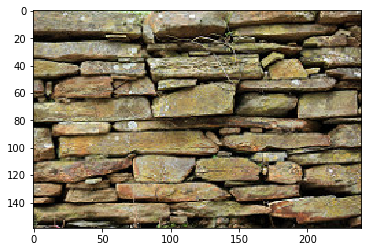

In [6]:
plt.imshow(im)

In [7]:
im[:3, :3]

array([[[0.6156863 , 0.6117647 , 0.5019608 , 1.        ],
        [0.6901961 , 0.6       , 0.4745098 , 1.        ],
        [0.6784314 , 0.57254905, 0.40392157, 1.        ]],

       [[0.43529412, 0.34901962, 0.20392157, 1.        ],
        [0.7254902 , 0.60784316, 0.4745098 , 1.        ],
        [0.73333335, 0.6156863 , 0.5058824 , 1.        ]],

       [[0.7764706 , 0.63529414, 0.49411765, 1.        ],
        [0.6431373 , 0.5529412 , 0.43137255, 1.        ],
        [0.6862745 , 0.62352943, 0.53333336, 1.        ]]], dtype=float32)

B&W images can contain a single number

In [8]:
train_data, test_data, train_labels, test_labels = load_fashion()

In [9]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((600, 28, 28, 1), (600, 3), (100, 28, 28, 1), (100, 3))

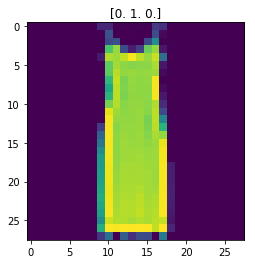

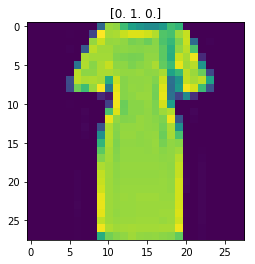

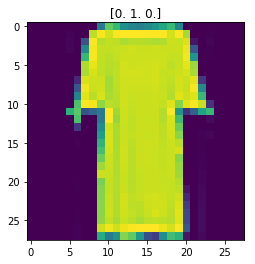

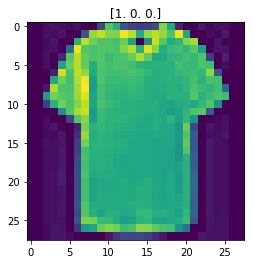

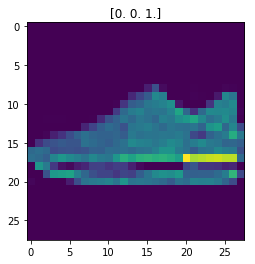

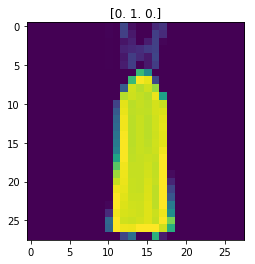

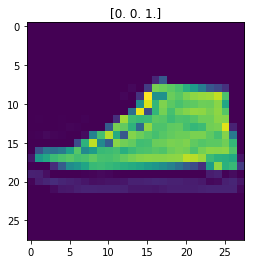

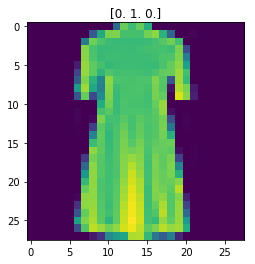

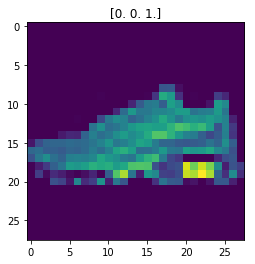

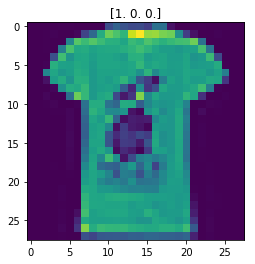

In [10]:
for im in range(10): 
    fig, ax = plt.subplots(1)
    ax.set_title(train_labels[im])
    ax.imshow(train_data[im].squeeze())

In [11]:
from keras.models import Sequential
from keras.layers import Dense

/Users/arokem/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
train_data.shape

(600, 28, 28, 1)

In [13]:
train_data = train_data.reshape((train_data.shape[0], -1))
test_data = test_data.reshape((test_data.shape[0], -1))

In [14]:
model = Sequential()
model.add(Dense(32, input_shape=(train_data.shape[-1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [16]:
model.fit(train_data, train_labels, epochs=10, batch_size=100, validation_split=0.2)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 0s 58us/step - loss: 0.1471 - acc: 0.9479 - val_loss: 0.2199 - val_acc: 0.9167
Epoch 2/10
480/480 [==============================] - 0s 70us/step - loss: 0.1421 - acc: 0.9542 - val_loss: 0.2088 - val_acc: 0.9250
Epoch 3/10
480/480 [==============================] - 0s 91us/step - loss: 0.1372 - acc: 0.9479 - val_loss: 0.2620 - val_acc: 0.9083
Epoch 4/10
480/480 [==============================] - 0s 75us/step - loss: 0.1162 - acc: 0.9583 - val_loss: 0.2093 - val_acc: 0.9167
Epoch 5/10
480/480 [==============================] - 0s 48us/step - loss: 0.1076 - acc: 0.9667 - val_loss: 0.1930 - val_acc: 0.9250
Epoch 6/10
480/480 [==============================] - 0s 74us/step - loss: 0.1242 - acc: 0.9563 - val_loss: 0.2355 - val_acc: 0.9250
Epoch 7/10
480/480 [==============================] - 0s 55us/step - loss: 0.0952 - acc: 0.9708 - val_loss: 0.3391 - val_acc: 0.8917
Epoch 8/10
480/480 [===